In [1]:
#Importing all the libraries needed

import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#%matplotlib notebook

#dataset = pd.read_excel('/home/roscon/Desktop/Data_latest/Model/Trail1.xlsx')  
dataset = pd.read_excel('/home/roscon/Documents/combined.xlsx')  
#dataset = pd.read_excel('/home/roscon/Documents/012.xlsx')  


#dataset = pd.read_excel('/home/roscon/Desktop/Data_latest/Model/report/d/0.xlsx',sheet_name=2)
dataset=dataset.dropna()
#dataset=dataset.drop(columns=['date'])
X = dataset.iloc[:, 0:7]
y = dataset.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)
sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
test_scores = []
train_scores = []
for i in range(1,15):
    classifier14 = KNeighborsClassifier(n_neighbors=i,p=2,metric= 'euclidean')
    classifier14.fit(X_train, y_train)
    
    train_scores.append(classifier14.score(X_train,y_train))
    test_scores.append(classifier14.score(X_test,y_test))

In [ ]:
print('X_train.shape -', X_train.shape)
print('y_train.shape -', y_train.shape)
print('X_test.shape  -', X_test.shape)
print('y_test.shape  -', y_test.shape)

In [ ]:
X_train[1:3]

In [ ]:
#Defining the model
Model = KNeighborsClassifier(n_neighbors=5,p=2,metric= 'euclidean')
#Training the model
Model.fit(X_train, y_train)
#Testing the model
y_pred =Model.predict(X_test)


In [ ]:
dataset.describe()

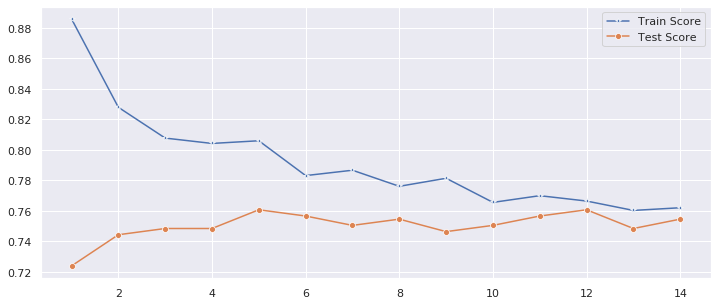

In [2]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Text(0.5, 12.5, 'Predicted label')

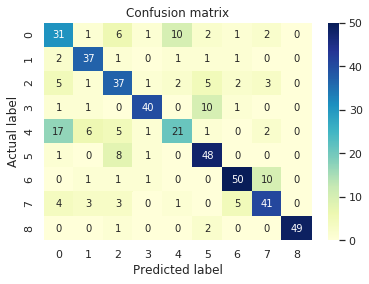

In [13]:
X2 = dataset.iloc[:, 0:7]
y2 = dataset.iloc[:, 7]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,random_state=0, test_size=0.3)
classifier = KNeighborsClassifier(n_neighbors=1,p=2,metric= 'euclidean')
classifier.fit(X_train2,y_train2)
y_pred2 = classifier.predict(X_test2)
plt.figure()
cnf_matrix = confusion_matrix(y_test2, y_pred2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
from sklearn.metrics import classification_report
print (classification_report (y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.48      0.74      0.58        54
           1       0.77      0.84      0.80        43
           2       0.76      0.61      0.67        56
           3       0.79      0.91      0.84        53
           4       0.72      0.49      0.58        53
           5       0.75      0.84      0.80        58
           6       0.89      0.78      0.83        63
           7       0.85      0.72      0.78        57
           8       1.00      0.94      0.97        52

    accuracy                           0.76       489
   macro avg       0.78      0.76      0.76       489
weighted avg       0.78      0.76      0.76       489



In [ ]:
y_pred = classifier14.predict(X_test)
plt.figure()
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print (classification_report (y_test,y_pred))

In [ ]:

X_train2 = dataset.iloc[:, 0:7]
y_train2 = dataset.iloc[:, 7]
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric= 'euclidean')
classifier.fit(X_train2,y_train2)
import pickle
filename = '/home/roscon/testing/src/parameters/combined.pkl'
filename1 = '/home/roscon/testing/src/parameters/combined_sc.pkl'
pickle.dump(classifier14, open(filename, 'wb'))
pickle.dump(StandardScaler, open(filename1 , 'wb'))
